# Import library

In [1]:
#Tools Visualization Data
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
%matplotlib inline

#Tools EDA
import pandas as pd
import numpy as np

#Tools Balancing
# from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SVMSMOTE


#Tools Algorithm ML dan  preprocessing 
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics

#Tools Matrix Validasi
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,roc_auc_score,plot_roc_curve,precision_score,recall_score,mean_squared_error,roc_curve,auc
from imblearn.metrics import sensitivity_specificity_support
from sklearn.model_selection import cross_val_score

#Tools Hypertuning Model
from sklearn.model_selection import GridSearchCV

#Misc
from collections import Counter
import joblib

In [2]:
df = pd.read_csv("wine_quality.csv")
df.head(10)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Bad
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Bad
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,Bad
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,Bad
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,Good
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,Good
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,Bad


In [3]:
df['quality'].value_counts()

Bad     1382
Good     217
Name: quality, dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-null   float64
 2   citric_acid           1599 non-null   float64
 3   residual_sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free_sulfur_dioxide   1599 non-null   float64
 6   total_sulfur_dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   object 
dtypes: float64(11), object(1)
memory usage: 150.0+ KB


In [5]:
df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000


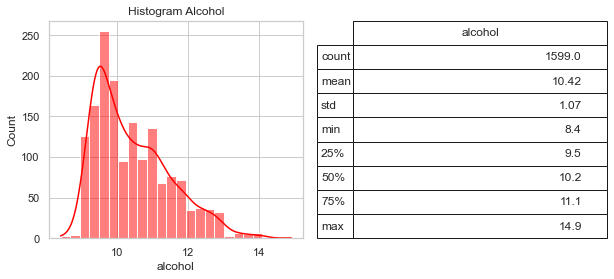

In [9]:
fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(121)
sns.histplot(df.alcohol,kde=True,color='red')
ax1.set_title('Histogram Alcohol')

dfxx = df.alcohol.describe().to_frame().round(2)

ax2 = fig.add_subplot(122)
font_size=12
bbox=[0, 0, 1, 1]
ax2.axis('off')
mpl_table = ax2.table(cellText = dfxx.values, rowLabels = dfxx.index, bbox=bbox, colLabels=dfxx.columns)
mpl_table.auto_set_font_size(False)
mpl_table.set_fontsize(font_size)

<AxesSubplot:>

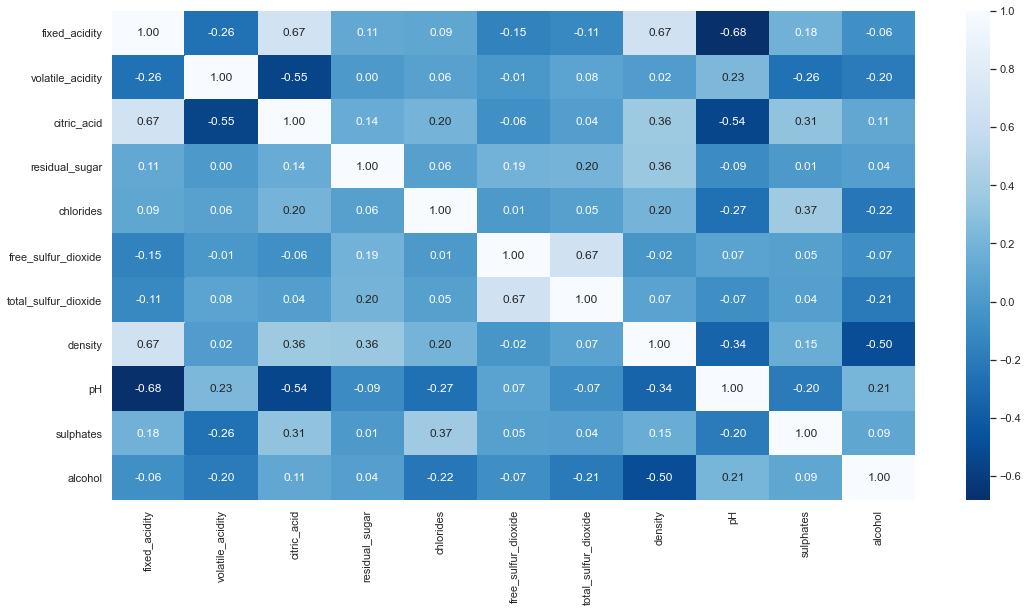

In [17]:
#correlation map to see correlation between variables
f,ax = plt.subplots(figsize=(18,9))

sns.set_theme(style="whitegrid")
sns.heatmap(df.corr(), annot=True,fmt='.2f',ax=ax,cmap='Blues_r')

In [11]:
df.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [18]:
y = df['quality']
X = df.drop(['quality'], axis=1)

In [20]:
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)
y

array([0, 0, 0, ..., 0, 0, 0])

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [41]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [42]:
print("y_train Shape : ", y_train.shape)
print("y_test Shape : ", y_test.shape)
print(sorted(Counter(y_train).items()))

y_train Shape :  (1199,)
y_test Shape :  (400,)
[(0, 1027), (1, 172)]


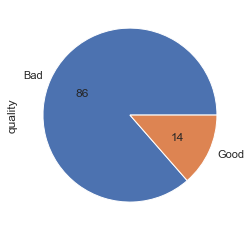

In [25]:
df.quality.value_counts().plot(kind="pie",autopct='%2.f')
plt.show()

In [43]:
oversample  = SVMSMOTE()
X_train,y_train = oversample.fit_resample(X_train,y_train)

In [44]:
print('Setelah OverSampling, komposisi Data latih X: {}'.format(X_train.shape)) 
print('Setelah OverSampling, komposisi Data latih Y: {} \n'.format(y_train.shape)) 
  
print("Setelah OverSampling, kategori '1': {}".format(sum(y_train == 1))) 
print("Setelah OverSampling, kategori '0': {}".format(sum(y_train == 0)))

Setelah OverSampling, komposisi Data latih X: (2054, 11)
Setelah OverSampling, komposisi Data latih Y: (2054,) 

Setelah OverSampling, kategori '1': 1027
Setelah OverSampling, kategori '0': 1027


In [45]:
model_pertama = SVC(kernel='rbf',random_state = 0)
model_pertama.fit(X_train, y_train)

SVC(random_state=0)

In [46]:
predict_model_pertama = model_pertama.predict(X_test)
acc = accuracy_score(y_test, predict_model_pertama)
precs = precision_score(y_test,predict_model_pertama)
recal = recall_score(y_test,predict_model_pertama)


print(classification_report(y_test, predict_model_pertama))
print("Accuracy = %.3f"  %acc)
print("Precision = %.2f" %precs)
print("Recall = %.2f " %recal)

              precision    recall  f1-score   support

           0       0.97      0.84      0.90       355
           1       0.38      0.78      0.51        45

    accuracy                           0.83       400
   macro avg       0.68      0.81      0.71       400
weighted avg       0.90      0.83      0.86       400

Accuracy = 0.835
Precision = 0.38
Recall = 0.78 


<AxesSubplot:>

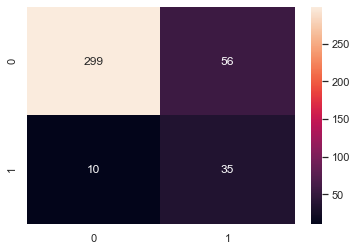

In [47]:
cm = confusion_matrix(y_test, predict_model_pertama)
sns.heatmap(cm,annot=True,fmt='2.0f')

In [48]:
accuracies = cross_val_score(estimator = model_pertama, X = X_train, y = y_train, cv = 10)
print("Total Akurasi validasi 10 kali = ", accuracies)
print("Rata-rata akurasi = ", accuracies.mean())

Total Akurasi validasi 10 kali =  [0.83009709 0.84466019 0.89805825 0.8592233  0.83414634 0.91707317
 0.93658537 0.90731707 0.92195122 0.93170732]
Rata-rata akurasi =  0.8880819322756335


In [49]:
rms = mean_squared_error(y_test,predict_model_pertama, squared=False)
print('RMSE = %.3f' %rms )

RMSE = 0.406


In [50]:
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, predict_model_pertama)
print('roc_auc_score for SVM: ', roc_auc_score(y_test, predict_model_pertama))

roc_auc_score for SVM:  0.8100156494522691


In [51]:
parameters = [{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
              {'C': [1, 10, 100, 1000], 'kernel': ['rbf'],
               'gamma': [0.1, 0.2, 0.3, 0.4, 0.5]}]
grid_search = GridSearchCV(estimator = model_pertama,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

In [52]:
print("Best paraneter = ",best_parameters)

Best paraneter =  {'C': 10, 'gamma': 0.5, 'kernel': 'rbf'}


In [53]:
model_optimal = SVC(C=10,gamma=0.5,kernel='rbf')
model_optimal.fit(X_train, y_train)

SVC(C=10, gamma=0.5)

In [54]:
model_optimal.predict(X_train)

array([0, 0, 0, ..., 1, 1, 1])

In [55]:
predict_model_optimal = model_optimal.predict(X_test)
acc = accuracy_score(y_test, predict_model_optimal)
precs = precision_score(y_test,predict_model_optimal)
recal = recall_score(y_test,predict_model_optimal)


print(classification_report(y_test, predict_model_optimal))
print("Accuracy = %.3f"  %acc)
print("Precision = %.2f" %precs)
print("Recall = %.2f " %recal)

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       355
           1       0.66      0.73      0.69        45

    accuracy                           0.93       400
   macro avg       0.81      0.84      0.83       400
weighted avg       0.93      0.93      0.93       400

Accuracy = 0.927
Precision = 0.66
Recall = 0.73 


<AxesSubplot:>

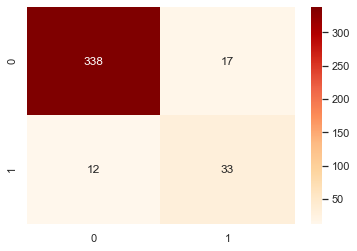

In [61]:
cm_model_optimal = confusion_matrix(y_test, predict_model_optimal)
sns.heatmap(cm_model_optimal,annot=True,fmt='2.0f',cmap='OrRd')

In [62]:
accuracie_model_optimal = cross_val_score(estimator = model_optimal, X = X_train, y = y_train, cv = 10)
print("Total Akurasi validasi 10 kali = ", accuracie_model_optimal)
print("Rata-rata akurasi = ", accuracie_model_optimal.mean())

Total Akurasi validasi 10 kali =  [0.9223301  0.9368932  0.98543689 0.94660194 0.96585366 0.96585366
 0.97560976 0.95609756 0.96097561 0.98536585]
Rata-rata akurasi =  0.9601018233483305


In [63]:
rmse_model_optimal = mean_squared_error(y_test,predict_model_optimal, squared=False)
print('RMSE = %.3f' %rmse_model_optimal )

RMSE = 0.269


In [64]:
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test, predict_model_optimal)
print('roc_auc_score for SVM: ', roc_auc_score(y_test, predict_model_optimal))

roc_auc_score for SVM:  0.8427230046948356


In [66]:
#Simpan model terbaik
filename = 'model_wine.pkl'
joblib.dump(model_optimal, filename)

['model_wine.pkl']